# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
#!pip install qiskit matplotlib

In [2]:
from c3.qiskit import C3Provider
from qiskit import transpile, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram

## Define a basic circuit to make a Bell State

In [3]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.barrier([0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])

In [4]:
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

## Get the C3 Provider and Backend

In [5]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_simulator")

In [6]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_simulator
Version: 1.1
Max Qubits: 5
OpenPulse Support: False
Basis Gates: ['u1', 'u2', 'u3', 'cx', 'id', 'unitary']


### Let's view how the Qiskit Transpiler will convert the circuit

In [7]:
trans_qc = transpile(qc, c3_backend)

In [8]:
trans_qc.draw()

┌─────────┐           ░ ┌─┐      
q_0: ┤ U2(0,π) ├──■────■───░─┤M├──────
     └─────────┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ───────────┤ X ├──┼───░──╫─┤M├───
                └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ────────────────┤ X ├─░──╫──╫─┤M├
                     └───┘ ░  ║  ║ └╥┘
c: 3/═════════════════════════╩══╩══╩═
                              0  1  2

## Run the simulation job

In [9]:
c3_job = execute(qc, c3_backend, shots=10)
result = c3_job.result()

In [10]:
res_counts = result.get_counts(qc)
print(res_counts)

{'000': 24, '111': 26}


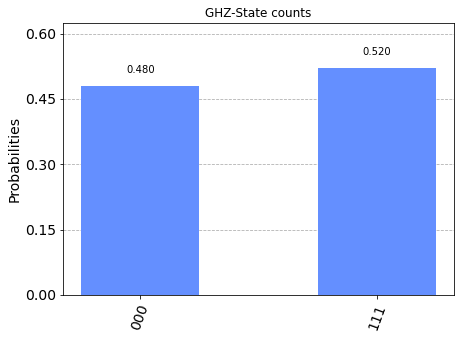

In [11]:
plot_histogram(res_counts, title='GHZ-State counts')